In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import github_theme.config as git_config

In [2]:
df_dnn = pd.read_csv("logs/halfcheetah_medium_dnn.csv")
df_dnn

,step,model_id,mse_loss,lr,train_mse,val_mse
0,0,0,0.039572,0.000495,0.039572,0.018915
1,1,0,0.015714,0.000490,0.015714,0.014688
2,2,0,0.012866,0.000485,0.012866,0.012826
3,3,0,0.011291,0.000480,0.011291,0.012127
4,4,0,0.010206,0.000475,0.010206,0.010355
...,...,...,...,...,...,...
995,495,1,0.000446,0.000003,0.000446,0.003094
996,496,1,0.000446,0.000003,0.000446,0.003094
997,497,1,0.000446,0.000003,0.000446,0.003096
998,498,1,0.000446,0.000003,0.000446,0.003095


In [3]:
df_pnn = pd.read_csv("logs/halfcheetah_medium_pnn.csv")
df_pnn

,step,model_id,gauss_loss,lr,train_mse,val_mse
0,0,0,-3.973979,0.000498,0.034277,0.035183
1,1,0,-5.151542,0.000495,0.022536,0.023295
2,2,0,-5.483389,0.000493,0.016258,0.016650
3,3,0,-5.683082,0.000490,0.014573,0.015137
4,4,0,-5.825614,0.000488,0.011683,0.012276
...,...,...,...,...,...,...
995,495,1,-10.326702,0.000042,0.001801,0.002281
996,496,1,-10.331409,0.000041,0.001807,0.002304
997,497,1,-10.337526,0.000041,0.001814,0.002306
998,498,1,-10.341070,0.000041,0.001799,0.002282


In [4]:
df_pnn_ns = pd.read_csv("logs/halfcheetah_medium_pnn_ns.csv")
df_pnn_ns

,step,model_id,gauss_loss,train_mse,val_mse
0,0,0,-3.973979,0.034277,0.035183
1,1,0,-5.149006,0.022515,0.023277
2,2,0,-5.480973,0.016226,0.016612
3,3,0,-5.676924,0.014417,0.014994
4,4,0,-5.817950,0.011665,0.012255
...,...,...,...,...,...
995,495,1,-8.455558,0.002237,0.002726
996,496,1,-8.465300,0.002090,0.002594
997,497,1,-8.460725,0.002071,0.002576
998,498,1,-8.463755,0.002140,0.002642


In [5]:
pivot_df = df_dnn.pivot_table(
    index="step",
    columns=["model_id"],
    values=["train_mse", "mse_loss"]
)
pivot_df

mse_loss           train_mse          
model_id         0         1         0         1
step                                            
0         0.039572  0.038551  0.039572  0.038551
1         0.015714  0.015666  0.015714  0.015666
2         0.012866  0.012874  0.012866  0.012874
3         0.011291  0.011266  0.011291  0.011266
4         0.010206  0.010280  0.010206  0.010280
...            ...       ...       ...       ...
495       0.000451  0.000446  0.000451  0.000446
496       0.000451  0.000446  0.000451  0.000446
497       0.000451  0.000446  0.000451  0.000446
498       0.000451  0.000446  0.000451  0.000446
499       0.000451  0.000445  0.000451  0.000445

[500 rows x 4 columns]

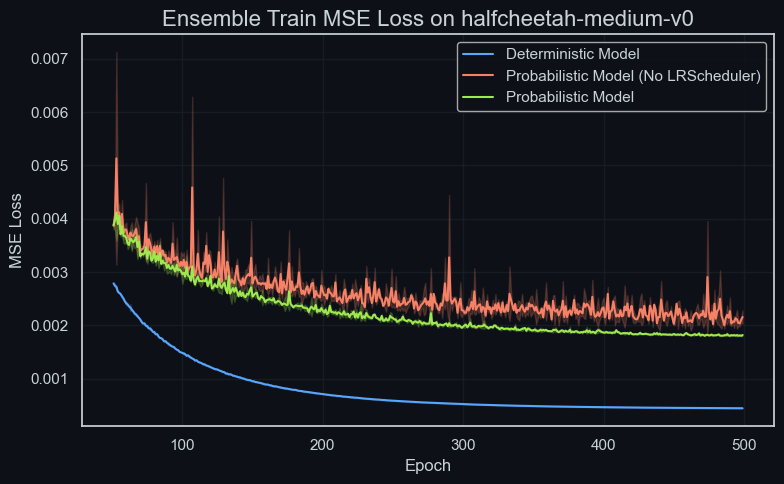

In [6]:
def plot_loss(dfs: [pd.DataFrame], column: str, labels: [str], palette: list[str], title: str = "", theme : str = 'light', save_path: str = None):
    git_config.set_theme(theme)
    fig, ax = plt.subplots(figsize=git_config.FIGSIZE)
    for df, label, color in zip(dfs, labels, palette):
        sns.lineplot(df[df["step"] > 50], x="step", y=column, errorbar="sd", c=color, label=label)
    ax.set_title(title, fontsize=git_config.TITLE_FONTSIZE)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("MSE Loss")
    ax.legend(title="")
    plt.tight_layout()
    if save_path is not None:
        plt.savefig(
            save_path, dpi=git_config.DPI, bbox_inches="tight", transparent=False, facecolor=plt.rcParams["figure.facecolor"]
        )
    plt.show()

dfs = [df_dnn, df_pnn_ns, df_pnn]
labels = ["Deterministic Model", "Probabilistic Model (No LRScheduler)", "Probabilistic Model"]
palette_light = [git_config.COLOR1_LIGHT, git_config.COLOR2_LIGHT, git_config.COLOR3_LIGHT]
palette_dark = [git_config.COLOR1_DARK, git_config.COLOR2_DARK, git_config.COLOR3_DARK]
title = "Ensemble Train MSE Loss on halfcheetah-medium-v0"
# plot_loss(dfs, "train_mse", labels, palette=palette_light, title=title, theme='light', save_path="../assets/loss_train_light.png")
plot_loss(dfs, "train_mse", labels, palette=palette_dark, title=title, theme='dark', save_path="../assets/loss_train_dark.png")


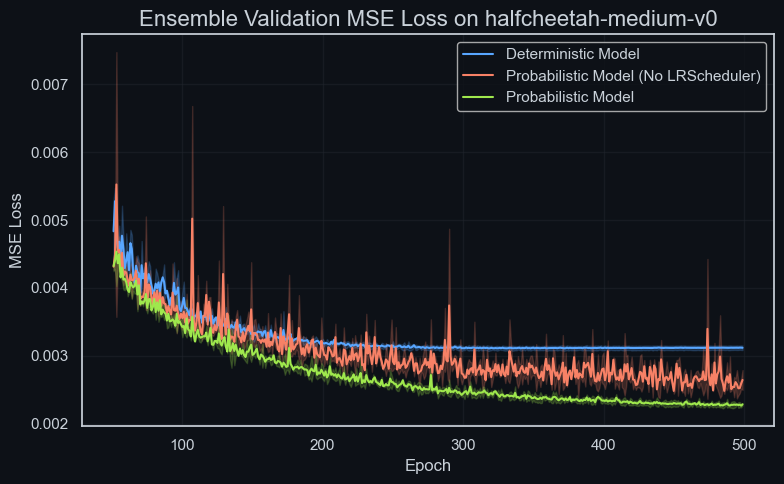

In [7]:
title = "Ensemble Validation MSE Loss on halfcheetah-medium-v0"
# plot_loss(dfs, "val_mse", labels, palette=palette_light, title=title, theme='light', save_path="../assets/loss_val_light.png")
plot_loss(dfs, "val_mse", labels, palette=palette_dark, title=title, theme='dark', save_path="../assets/loss_val_dark.png")